# Método das Linhas 

In [1]:
from numpy import *
import sympy as sy 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

O código abaixo usa o método de Euler explícito para resolver a EDP do calor unidimensional. 

In [2]:
def met_linhas_euler(d0,d1,f,G,t0,T,h,m):
    """
    Usa o metodo das linhas para resolver
    ut = uxx + G(x,t), 0 < x < 1, 0 < t < T
    com C.C. 
    u(0,t) = d0(t), u(1,t) = d1(t)
    e C.I.
    u(x,0) = f(x).
    
    Usa o metodo de Euler para resolver o 
    sistema de EDOs. Para a discretizacao, 
    usa passo espacial delta = 1/m e passo 
    temporal h. Para estabilidade numérica, 
    usa h = 1/(2*m**2) ou menor.
    """
    x = linspace(0,1,m+1)
    delta = 1/m
    delta_sqr = delta**2
        
    N = round((T - t0)/h) + 1
    t = linspace(t0,(N-1)*h,N)
    
    # inicializa u 
    u = zeros((m+1,N))

    # construir vetores, se funcao constante
    if isinstance(d0,float):
        d0 = d0*ones(N)
        u[0,:] = d0
    else:
        u[0,:] = d0(t)
        
    if isinstance(d1,float):
        d1 = d1*ones(N)
        u[m,:] = d1
    else:
        u[m,:] = d1(t)
        
    if isinstance(f,float):
        f = f*ones(N)
        u[:,0] = f
    else:
        u[:,0] = f(x)
            
    # Resolve para u usando Euler 
    for n in range(1,N):
        g = G(x[1:m-1],t[n-1])
        u[1:m,n] = u[1:m,n-1] + (h/delta_sqr)*(u[0:(m-1),n])
        - 2*u[1:m-1,n-1] + u[2:m,n-1] + h*g
            
    return x,t,u

A solução exata para a EDP é $u(x,t) = \exp(-0.1t){\rm sen}(\pi x)$. A partir desta função obteremos todos os demais termos da EDP. Abaixo, encontraremos as derivadas parciais em relação ao tempo e ao espaço. 

In [3]:
# u(x,t) = exp(-0.1*t)*sin(pi*x)

# variaveis simbólicas
xsym,tsym = sy.symbols('x,t')

# u(x,t)
u = sy.exp(-0.1*tsym)*sy.sin(sy.pi*xsym)

# dudt 
dudt = sy.diff(u,tsym)

# d2udx2
d2udx2 = sy.diff(u,xsym,2)

# G(x,t)
Gxt = dudt - d2udx2

print(Gxt)

-0.1*exp(-0.1*t)*sin(pi*x) + pi**2*exp(-0.1*t)*sin(pi*x)


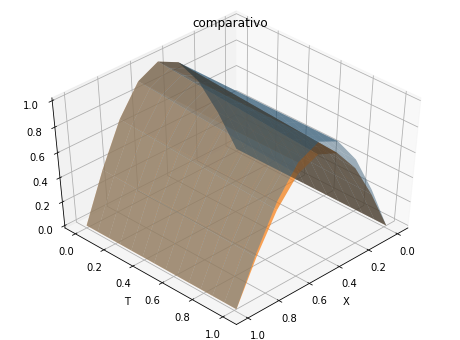

In [17]:
# d0 = u(0,t) = 0
# d1 = u(1,t) = 0
# f = sin(pi*x)
# -0.1*exp(-0.1*t)*sin(pi*x) + pi**2*exp(-0.1*t)*sin(pi*x)
d0 = 0.0
d1 = 0.0
f = lambda x: sin(pi*x)
G = lambda x,t: -0.1*exp(-0.1*t)*sin(pi*x) + pi**2*exp(-0.1*t)*sin(pi*x)
t0 = 0.0
T = 1.0
h = 0.078
m = 8

# sol. numerica
x,t,un = met_linhas_euler(d0,d1,f,G,t0,T,h,m)

TT,X = meshgrid(t,x)

# sol. exata
ue = exp(-0.1*TT)*sin(pi*X)

# plotagem
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, TT, un, alpha=0.4)
ax.plot_surface(X, TT, ue, alpha=0.7)

plt.xlabel('X')
plt.ylabel('T')
plt.title('comparativo')
ax.view_init(45, 45)

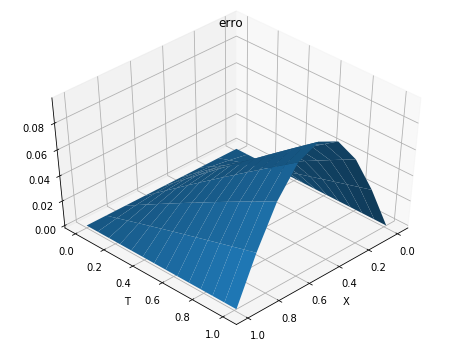

In [18]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, TT, abs(ue-un), alpha=1.)
plt.xlabel('X')
plt.ylabel('T')
plt.title('erro')
ax.view_init(45, 45)